In [3]:
# # Plot SDS data availability

import sys

import header
paths = header.setup_environment()
print(paths)
import os
import pandas as pd
from obspy import UTCDateTime
sys.path.append(os.path.join(paths['Developer'], 'SoufriereHillsVolcano', 'lib'))
import SDS
import libWellData as LLE


Linux
{'HOME': '/home/thompsong', 'Developer': '/home/thompsong/Developer', 'repodir': '/home/thompsong/Developer/KSCRocketSeismoHydrology/Python/new_workflow', 'work': '/home/thompsong/work', 'local_outdir': '/home/thompsong/work/PROJECTS/KSC_EROSION', 'DROPBOX_TOP': '/home/thompsong/Dropbox', 'new_data': '/data/KSC/EROSION/fromdropboxinventory', 'DROPBOX_DATA_TOP': '/home/thompsong/Dropbox/PROFESSIONAL/RESEARCH/3_Project_Documents/NASAprojects/201602_Rocket_Seismology/DATA/2022_DATA', 'dropbox_outdir': '/home/thompsong/Dropbox/PROFESSIONAL/RESEARCH/3_Project_Documents/NASAprojects/201602_Rocket_Seismology/DATA/2022_DATA/new_workflow', 'WELLDATA_TOP': '/home/thompsong/Dropbox/PROFESSIONAL/RESEARCH/3_Project_Documents/NASAprojects/201602_Rocket_Seismology/DATA/2022_DATA/WellData', 'TOB3_DIR': '/home/thompsong/Dropbox/PROFESSIONAL/RESEARCH/3_Project_Documents/NASAprojects/201602_Rocket_Seismology/DATA/2022_DATA/WellData/Uploads', 'transducersCSVfile': '/home/thompsong/Developer/KSCRocke

In [4]:
transducersDF = LLE.get_transducers_dataframe(paths)
startover = True

# Availability by day
startdate = UTCDateTime(2022,7,21)
enddate = UTCDateTime(2022,12,3)
SDS_DIR = '/data/SDS'
#sdsobj = SDS.SDSobj(paths['SDS_TOP'])
sdsobj = SDS.SDSobj(SDS_DIR)
sdsbase = os.path.basename(SDS_DIR)
trace_ids = None
availabilityDIR = os.path.join(paths['local_outdir'], 'availability')
availabilityCSV = os.path.join(availabilityDIR, f"{sdsbase}.csv")
wellPNG=os.path.join(availabilityDIR,f"{sdsbase}_well.png")
SApng=os.path.join(availabilityDIR,f"{sdsbase}_SA.png")
if startover:
    if os.path.isfile(availabilityCSV):
        os.remove(availabilityCSV)
if os.path.isfile(wellPNG):
    os.remove(wellPNG)
if os.path.isfile(SApng):
    os.remove(SApng)


In [5]:
import importlib
importlib.reload(SDS)
if os.path.isfile(availabilityCSV): # would have to change startover to False to get here
    availabilityDF = pd.read_csv(availabilityCSV, index_col=None)
    trace_ids = availabilityDF.columns[1:]
else:
    print(startdate, enddate, trace_ids)
    #a = sdsobj._sds_percent_available_per_day(startdate, enddate, trace_ids=trace_ids, speed=1)
    #print(a)
    #print(sdsobj)
    #print(sdsobj.client.get_all_nslc())
    trace_ids = sdsobj._sds_get_nonempty_traceids(startdate, endday=enddate, skip_low_rate_channels=True)
    availabilityDF, trace_ids = sdsobj._sds_percent_available_per_day(startdate, enddate, trace_ids=trace_ids, speed=3)
    availabilityDF.to_csv(availabilityCSV, index=False)


2022-07-21T00:00:00.000000Z 2022-12-03T00:00:00.000000Z None
['AM.R095E.00.EHZ', 'AM.R095E.00.HDF', 'AM.R17FC.00.EHZ', 'AM.R17FC.00.HDF', 'AM.R1E5E.00.EHE', 'AM.R1E5E.00.EHN', 'AM.R1E5E.00.EHZ', 'AM.R976A.00.EHE', 'AM.R976A.00.EHN', 'AM.R976A.00.EHZ', 'AM.RC304.00.EHZ', 'AM.RC57A.00.EHZ', 'AM.RCC6E.00.EHZ', 'AM.RCC6E.00.HDF', 'FL.BCHH2.10.HD4', 'FL.BCHH2.10.HD5', 'FL.BCHH2.10.HD6', 'FL.BCHH2.10.HD7', 'FL.BCHH2.10.HD8', 'FL.BCHH2.10.HD9', 'FL.BCHH4.00.HD2', 'FL.BCHH4.00.HD3', 'FL.BCHH4.00.HDF', 'FL.BCHH4.10.HHE', 'FL.BCHH4.10.HHN', 'FL.BCHH4.10.HHZ', 'FL.S39A1.00.HHE', 'FL.S39A1.00.HHN', 'FL.S39A1.00.HHZ', 'FL.S39A1.10.HDF', 'FL.S39A2.00.HHE', 'FL.S39A2.00.HHN', 'FL.S39A2.00.HHZ', 'FL.S39A2.10.HDF', 'IU.DWPF.00.BH1', 'IU.DWPF.00.BH2', 'IU.DWPF.00.BHZ', 'IU.DWPF.10.BH1', 'IU.DWPF.10.BH2', 'IU.DWPF.10.BHZ', 'IU.DWPF.60.BH1', 'IU.DWPF.60.BH2', 'IU.DWPF.60.BHZ', 'XA.MTEGL.01.CNE', 'XA.MTEGL.01.CNN', 'XA.MTEGL.01.CNZ']
2022-07-21T00:00:00.000000Z 2022-12-03T00:00:00.000000Z 2022-07-21T00:00:

/home/thompsong/miniconda3new/envs/passoft3/lib/python3.10/site-packages/obspy/io/mseed/headers.py:805: InternalMSEEDWarning: readMSEEDBuffer(): Not a SEED record. Will skip bytes 9824256 to 9824383.
  warnings.warn(_w, InternalMSEEDWarning)
/home/thompsong/miniconda3new/envs/passoft3/lib/python3.10/site-packages/obspy/io/mseed/headers.py:805: InternalMSEEDWarning: readMSEEDBuffer(): Not a SEED record. Will skip bytes 9824384 to 9824511.
  warnings.warn(_w, InternalMSEEDWarning)
/home/thompsong/miniconda3new/envs/passoft3/lib/python3.10/site-packages/obspy/io/mseed/headers.py:805: InternalMSEEDWarning: readMSEEDBuffer(): Not a SEED record. Will skip bytes 9824512 to 9824639.
  warnings.warn(_w, InternalMSEEDWarning)
/home/thompsong/miniconda3new/envs/passoft3/lib/python3.10/site-packages/obspy/io/mseed/headers.py:805: InternalMSEEDWarning: readMSEEDBuffer(): Not a SEED record. Will skip bytes 9824640 to 9824767.
  warnings.warn(_w, InternalMSEEDWarning)
/home/thompsong/miniconda3new/en

2022-09-20


/home/thompsong/miniconda3new/envs/passoft3/lib/python3.10/site-packages/obspy/io/mseed/headers.py:805: InternalMSEEDWarning: readMSEEDBuffer(): Not a SEED record. Will skip bytes 9824256 to 9824383.
  warnings.warn(_w, InternalMSEEDWarning)
/home/thompsong/miniconda3new/envs/passoft3/lib/python3.10/site-packages/obspy/io/mseed/headers.py:805: InternalMSEEDWarning: readMSEEDBuffer(): Not a SEED record. Will skip bytes 9824384 to 9824511.
  warnings.warn(_w, InternalMSEEDWarning)
/home/thompsong/miniconda3new/envs/passoft3/lib/python3.10/site-packages/obspy/io/mseed/headers.py:805: InternalMSEEDWarning: readMSEEDBuffer(): Not a SEED record. Will skip bytes 9824512 to 9824639.
  warnings.warn(_w, InternalMSEEDWarning)
/home/thompsong/miniconda3new/envs/passoft3/lib/python3.10/site-packages/obspy/io/mseed/headers.py:805: InternalMSEEDWarning: readMSEEDBuffer(): Not a SEED record. Will skip bytes 9824640 to 9824767.
  warnings.warn(_w, InternalMSEEDWarning)
/home/thompsong/miniconda3new/en

2022-09-21


/home/thompsong/miniconda3new/envs/passoft3/lib/python3.10/site-packages/obspy/io/mseed/headers.py:805: InternalMSEEDWarning: readMSEEDBuffer(): Not a SEED record. Will skip bytes 9824256 to 9824383.
  warnings.warn(_w, InternalMSEEDWarning)
/home/thompsong/miniconda3new/envs/passoft3/lib/python3.10/site-packages/obspy/io/mseed/headers.py:805: InternalMSEEDWarning: readMSEEDBuffer(): Not a SEED record. Will skip bytes 9824384 to 9824511.
  warnings.warn(_w, InternalMSEEDWarning)
/home/thompsong/miniconda3new/envs/passoft3/lib/python3.10/site-packages/obspy/io/mseed/headers.py:805: InternalMSEEDWarning: readMSEEDBuffer(): Not a SEED record. Will skip bytes 9824512 to 9824639.
  warnings.warn(_w, InternalMSEEDWarning)
/home/thompsong/miniconda3new/envs/passoft3/lib/python3.10/site-packages/obspy/io/mseed/headers.py:805: InternalMSEEDWarning: readMSEEDBuffer(): Not a SEED record. Will skip bytes 9824640 to 9824767.
  warnings.warn(_w, InternalMSEEDWarning)
/home/thompsong/miniconda3new/en

2022-09-22
2022-09-23
2022-09-24
2022-09-25


/home/thompsong/miniconda3new/envs/passoft3/lib/python3.10/site-packages/obspy/io/mseed/headers.py:805: InternalMSEEDWarning: readMSEEDBuffer(): Not a SEED record. Will skip bytes 6702080 to 6702207.
  warnings.warn(_w, InternalMSEEDWarning)
/home/thompsong/miniconda3new/envs/passoft3/lib/python3.10/site-packages/obspy/io/mseed/headers.py:805: InternalMSEEDWarning: readMSEEDBuffer(): Not a SEED record. Will skip bytes 6702208 to 6702335.
  warnings.warn(_w, InternalMSEEDWarning)
/home/thompsong/miniconda3new/envs/passoft3/lib/python3.10/site-packages/obspy/io/mseed/headers.py:805: InternalMSEEDWarning: readMSEEDBuffer(): Not a SEED record. Will skip bytes 6702336 to 6702463.
  warnings.warn(_w, InternalMSEEDWarning)
/home/thompsong/miniconda3new/envs/passoft3/lib/python3.10/site-packages/obspy/io/mseed/headers.py:805: InternalMSEEDWarning: readMSEEDBuffer(): Not a SEED record. Will skip bytes 6702464 to 6702591.
  warnings.warn(_w, InternalMSEEDWarning)
/home/thompsong/miniconda3new/en

2022-09-26


/home/thompsong/miniconda3new/envs/passoft3/lib/python3.10/site-packages/obspy/io/mseed/headers.py:805: InternalMSEEDWarning: readMSEEDBuffer(): Not a SEED record. Will skip bytes 6702080 to 6702207.
  warnings.warn(_w, InternalMSEEDWarning)
/home/thompsong/miniconda3new/envs/passoft3/lib/python3.10/site-packages/obspy/io/mseed/headers.py:805: InternalMSEEDWarning: readMSEEDBuffer(): Not a SEED record. Will skip bytes 6702208 to 6702335.
  warnings.warn(_w, InternalMSEEDWarning)
/home/thompsong/miniconda3new/envs/passoft3/lib/python3.10/site-packages/obspy/io/mseed/headers.py:805: InternalMSEEDWarning: readMSEEDBuffer(): Not a SEED record. Will skip bytes 6702336 to 6702463.
  warnings.warn(_w, InternalMSEEDWarning)
/home/thompsong/miniconda3new/envs/passoft3/lib/python3.10/site-packages/obspy/io/mseed/headers.py:805: InternalMSEEDWarning: readMSEEDBuffer(): Not a SEED record. Will skip bytes 6702464 to 6702591.
  warnings.warn(_w, InternalMSEEDWarning)
/home/thompsong/miniconda3new/en

2022-09-27


/home/thompsong/miniconda3new/envs/passoft3/lib/python3.10/site-packages/obspy/io/mseed/headers.py:805: InternalMSEEDWarning: readMSEEDBuffer(): Not a SEED record. Will skip bytes 6702080 to 6702207.
  warnings.warn(_w, InternalMSEEDWarning)
/home/thompsong/miniconda3new/envs/passoft3/lib/python3.10/site-packages/obspy/io/mseed/headers.py:805: InternalMSEEDWarning: readMSEEDBuffer(): Not a SEED record. Will skip bytes 6702208 to 6702335.
  warnings.warn(_w, InternalMSEEDWarning)
/home/thompsong/miniconda3new/envs/passoft3/lib/python3.10/site-packages/obspy/io/mseed/headers.py:805: InternalMSEEDWarning: readMSEEDBuffer(): Not a SEED record. Will skip bytes 6702336 to 6702463.
  warnings.warn(_w, InternalMSEEDWarning)
/home/thompsong/miniconda3new/envs/passoft3/lib/python3.10/site-packages/obspy/io/mseed/headers.py:805: InternalMSEEDWarning: readMSEEDBuffer(): Not a SEED record. Will skip bytes 6702464 to 6702591.
  warnings.warn(_w, InternalMSEEDWarning)
/home/thompsong/miniconda3new/en

2022-09-28
2022-09-29
2022-09-30
2022-10-01
2022-10-02
2022-10-03
2022-10-04
2022-10-05
2022-10-06
2022-10-07
2022-10-08
2022-10-09
2022-10-10
2022-10-11
2022-10-12
2022-10-13
2022-10-14
2022-10-15
2022-10-16
2022-10-17
2022-10-18
2022-10-19
2022-10-20
2022-10-21
2022-10-22
2022-10-23
2022-10-24
2022-10-25
2022-10-26
2022-10-27
2022-10-28
2022-10-29
2022-10-30
2022-10-31
2022-11-01
2022-11-02
2022-11-03
2022-11-04
2022-11-05
2022-11-06
2022-11-07
2022-11-08
2022-11-09
2022-11-10
2022-11-11
2022-11-12
2022-11-13
2022-11-14
2022-11-15


/home/thompsong/miniconda3new/envs/passoft3/lib/python3.10/site-packages/obspy/io/mseed/headers.py:805: InternalMSEEDWarning: readMSEEDBuffer(): Not a SEED record. Will skip bytes 9673728 to 9673855.
  warnings.warn(_w, InternalMSEEDWarning)
/home/thompsong/miniconda3new/envs/passoft3/lib/python3.10/site-packages/obspy/io/mseed/headers.py:805: InternalMSEEDWarning: readMSEEDBuffer(): Not a SEED record. Will skip bytes 9673856 to 9673983.
  warnings.warn(_w, InternalMSEEDWarning)
/home/thompsong/miniconda3new/envs/passoft3/lib/python3.10/site-packages/obspy/io/mseed/headers.py:805: InternalMSEEDWarning: readMSEEDBuffer(): Not a SEED record. Will skip bytes 9673984 to 9674111.
  warnings.warn(_w, InternalMSEEDWarning)
/home/thompsong/miniconda3new/envs/passoft3/lib/python3.10/site-packages/obspy/io/mseed/headers.py:805: InternalMSEEDWarning: readMSEEDBuffer(): Not a SEED record. Will skip bytes 9674112 to 9674239.
  warnings.warn(_w, InternalMSEEDWarning)
/home/thompsong/miniconda3new/en

2022-11-16


/home/thompsong/miniconda3new/envs/passoft3/lib/python3.10/site-packages/obspy/io/mseed/headers.py:805: InternalMSEEDWarning: readMSEEDBuffer(): Not a SEED record. Will skip bytes 9673728 to 9673855.
  warnings.warn(_w, InternalMSEEDWarning)
/home/thompsong/miniconda3new/envs/passoft3/lib/python3.10/site-packages/obspy/io/mseed/headers.py:805: InternalMSEEDWarning: readMSEEDBuffer(): Not a SEED record. Will skip bytes 9673856 to 9673983.
  warnings.warn(_w, InternalMSEEDWarning)
/home/thompsong/miniconda3new/envs/passoft3/lib/python3.10/site-packages/obspy/io/mseed/headers.py:805: InternalMSEEDWarning: readMSEEDBuffer(): Not a SEED record. Will skip bytes 9673984 to 9674111.
  warnings.warn(_w, InternalMSEEDWarning)
/home/thompsong/miniconda3new/envs/passoft3/lib/python3.10/site-packages/obspy/io/mseed/headers.py:805: InternalMSEEDWarning: readMSEEDBuffer(): Not a SEED record. Will skip bytes 9674112 to 9674239.
  warnings.warn(_w, InternalMSEEDWarning)
/home/thompsong/miniconda3new/en

2022-11-17


/home/thompsong/miniconda3new/envs/passoft3/lib/python3.10/site-packages/obspy/io/mseed/headers.py:805: InternalMSEEDWarning: readMSEEDBuffer(): Not a SEED record. Will skip bytes 9673728 to 9673855.
  warnings.warn(_w, InternalMSEEDWarning)
/home/thompsong/miniconda3new/envs/passoft3/lib/python3.10/site-packages/obspy/io/mseed/headers.py:805: InternalMSEEDWarning: readMSEEDBuffer(): Not a SEED record. Will skip bytes 9673856 to 9673983.
  warnings.warn(_w, InternalMSEEDWarning)
/home/thompsong/miniconda3new/envs/passoft3/lib/python3.10/site-packages/obspy/io/mseed/headers.py:805: InternalMSEEDWarning: readMSEEDBuffer(): Not a SEED record. Will skip bytes 9673984 to 9674111.
  warnings.warn(_w, InternalMSEEDWarning)
/home/thompsong/miniconda3new/envs/passoft3/lib/python3.10/site-packages/obspy/io/mseed/headers.py:805: InternalMSEEDWarning: readMSEEDBuffer(): Not a SEED record. Will skip bytes 9674112 to 9674239.
  warnings.warn(_w, InternalMSEEDWarning)
/home/thompsong/miniconda3new/en

2022-11-18
2022-11-19
2022-11-20
2022-11-21
2022-11-22
2022-11-23
2022-11-24
2022-11-25
2022-11-26
2022-11-27
2022-11-28
2022-11-29
2022-11-30
2022-12-01
2022-12-02
           date  AM.R095E.00.EHZ  AM.R095E.00.HDF  AM.R17FC.00.EHZ  \
0    2022-07-21        99.998854        99.998854        99.998843   
1    2022-07-22        99.998854        99.998854        99.998843   
2    2022-07-23        99.998854        99.998854        99.998843   
3    2022-07-24        99.998854        99.998854        99.998843   
4    2022-07-25        99.998854        99.998854        99.998843   
..          ...              ...              ...              ...   
130  2022-11-28         0.000000         0.000000         0.000000   
131  2022-11-29         0.000000         0.000000         0.000000   
132  2022-11-30         0.000000         0.000000         0.000000   
133  2022-12-01         0.000000         0.000000         0.000000   
134  2022-12-02         0.000000         0.000000         0.00000

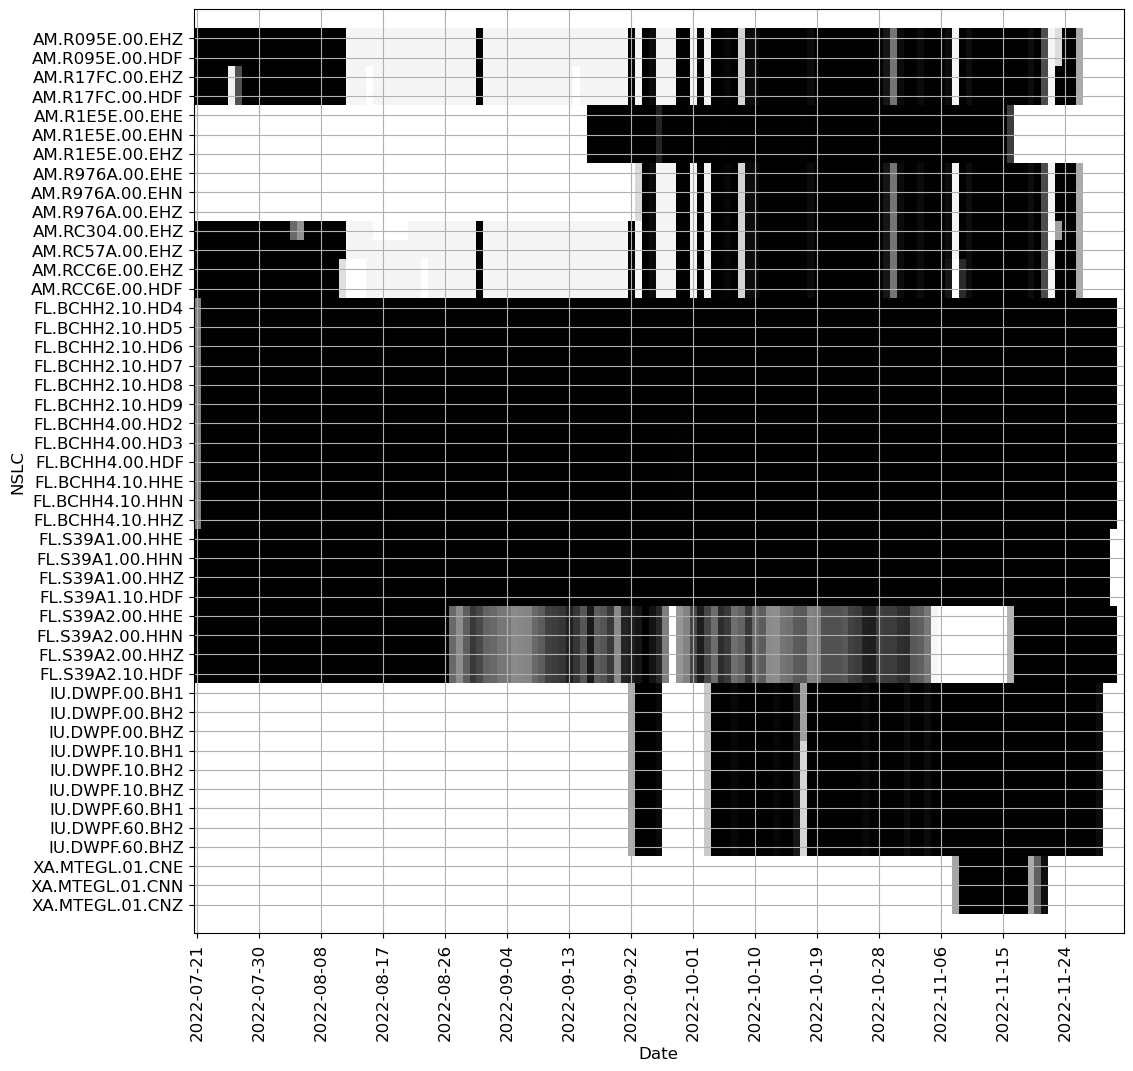

In [7]:

def reorder_trace_ids(df, ordered_ids):
    print(ordered_ids)
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    d = df['date']
    df = df.loc[:, ordered_ids]
    df.insert(0, 'date', d)
    return df
'''
well_availabilityDF = availabilityDF.copy()
for id in trace_ids:
    if id[0] !='6':
        well_availabilityDF.drop(labels=id, axis=1, inplace=True)
well_availabilityDF = reorder_trace_ids(well_availabilityDF, transducersDF['id'].to_list())
sdsobj.plot_availability(well_availabilityDF, outfile=wellPNG, labels=transducersDF.serial.to_list())
'''
SA_availabilityDF = availabilityDF.copy()
for id in trace_ids:
    if id[0] =='6':
        SA_availabilityDF.drop(labels=id, axis=1, inplace=True)
sdsobj.plot_availability(SA_availabilityDF, outfile=SApng)


# Falcon 9 Block 5 | Starlink Group 4-35		September 24, 2022	SLC-40	23:32:10 UTC
